# Gender prediction with voice and speech data

### Using classification methods with Decision Tree, Random Forests, Boosting, SVM, 

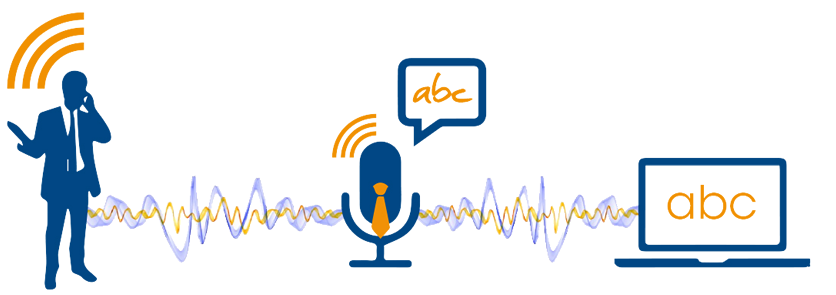

### Goal here is to predict  gender with voice and speech, data is loaded with 21 variables with target variable of male and female

####  20  Explainatory variables includes:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- meanfun: mean fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: mean of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index

In [1]:
#IMPORTING PACKAGES

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import pandas_profiling
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.manifold import TSNE
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

#HTML Borders

In [3]:
#Loading Data

data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
data.sample()  # data sample

meanfreq        sd    median       Q25       Q75       IQR      skew  \
3033  0.206107  0.042296  0.210754  0.197677  0.228862  0.031186  2.645897   

          kurt    sp.ent       sfm  ...  centroid  meanfun  minfun   maxfun  \
3033  10.09434  0.855921  0.264527  ...  0.206107  0.20613     0.1  0.27027   

       meandom    mindom    maxdom   dfrange   modindx   label  
3033  0.367839  0.004883  0.859375  0.854492  0.326429  female  

[1 rows x 21 columns]

In [5]:
data.shape  # Data shape

(3168, 21)

In [6]:
data.describe()   # Describing data

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [7]:
# Profile Report

pandas_profiling.ProfileReport(data) 

In [8]:
data1 = data.copy(deep=True)    

In [9]:
#Finding Missing Data

def missing_data(data1):
    total = data1.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data1.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data1)

Total  Percent
label         0      0.0
sfm           0      0.0
sd            0      0.0
median        0      0.0
Q25           0      0.0
Q75           0      0.0
IQR           0      0.0
skew          0      0.0
kurt          0      0.0
sp.ent        0      0.0
mode          0      0.0
modindx       0      0.0
centroid      0      0.0
meanfun       0      0.0
minfun        0      0.0
maxfun        0      0.0
meandom       0      0.0
mindom        0      0.0
maxdom        0      0.0
dfrange       0      0.0
meanfreq      0      0.0

In [10]:
#Finding total number of males and females

print("Total : {}".format(data1.shape[0]))
print("Number of male: {}".format(data1[data1.label == 'male'].shape[0]))
print("Number of female: {}".format(data1[data1.label == 'female'].shape[0]))

Total : 3168
Number of male: 1584
Number of female: 1584


Text(0.5, 1.0, 'Correlation between features')

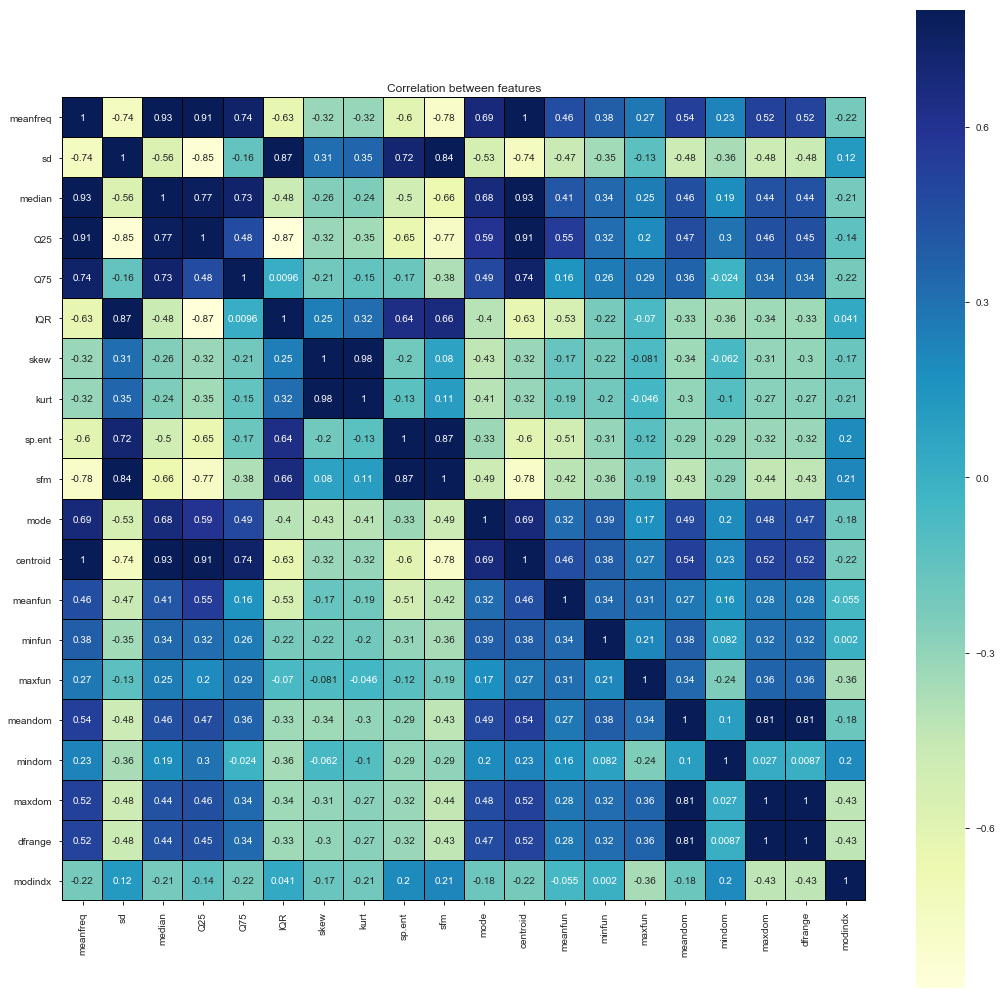

In [11]:
#Correlation of different features 

corr = data1.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

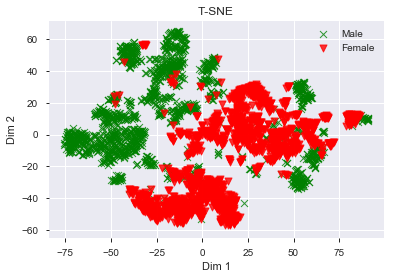

In [12]:
#TNSE Analysis

X = data1.iloc[:, :-1]
y = data1['label']
y = y.replace({'male':1,'female':0})

# Rescale data1 before TSNE
X_scale = StandardScaler().fit_transform(X)

# Sklearn TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_scale)

plt.figure()
plt.scatter(X_t[np.where(y == 0), 0],
                   X_t[np.where(y == 0), 1],
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[np.where(y == 1), 0],
                   X_t[np.where(y == 1), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.show()

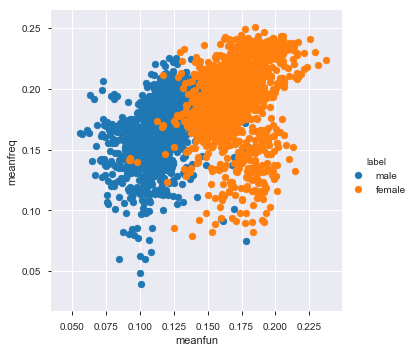

In [13]:
sns.FacetGrid(data, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

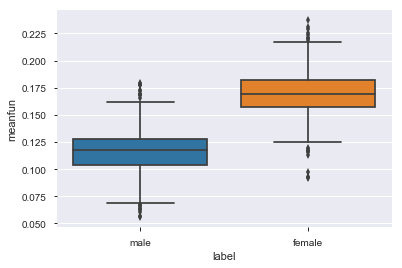

In [14]:
#Boxplot

sns.boxplot(x="label",y="meanfun",data=data1)
plt.show()

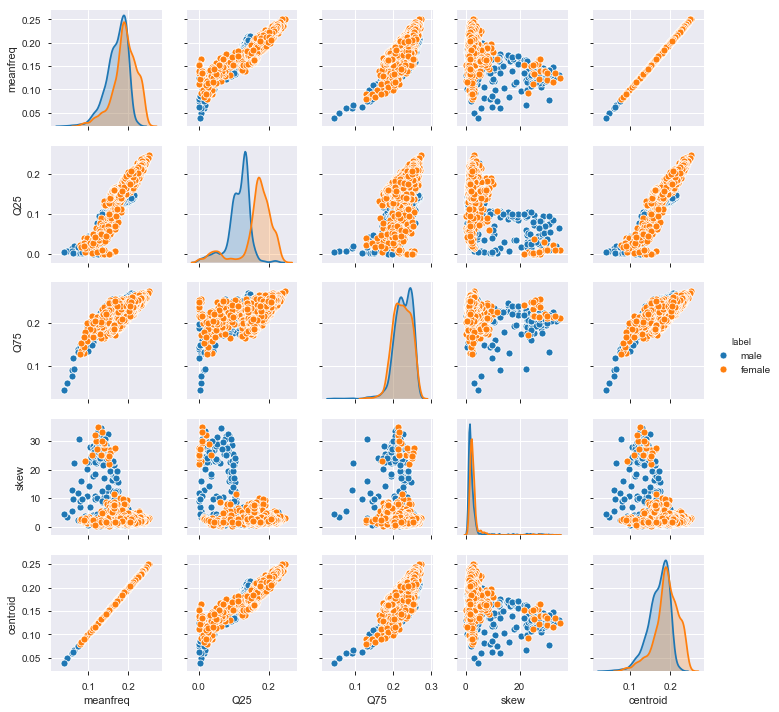

In [15]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)
plt.show()

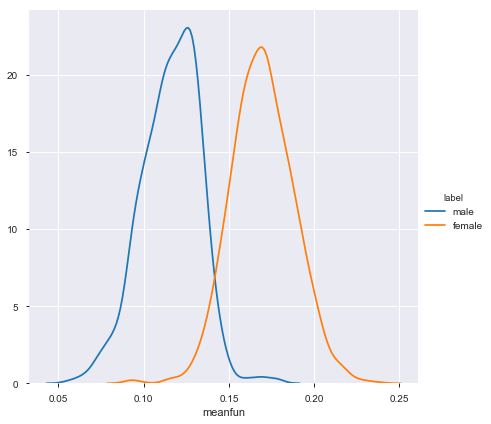

In [16]:
sns.FacetGrid(data1, hue="label", size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

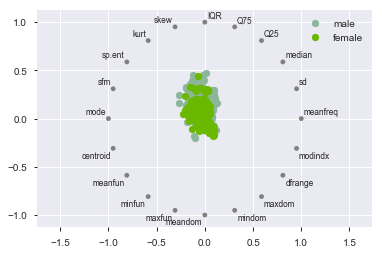

In [17]:
from pandas.plotting import radviz
radviz(data, "label")
plt.show()

In [18]:
mydata = data.copy(deep=True)    

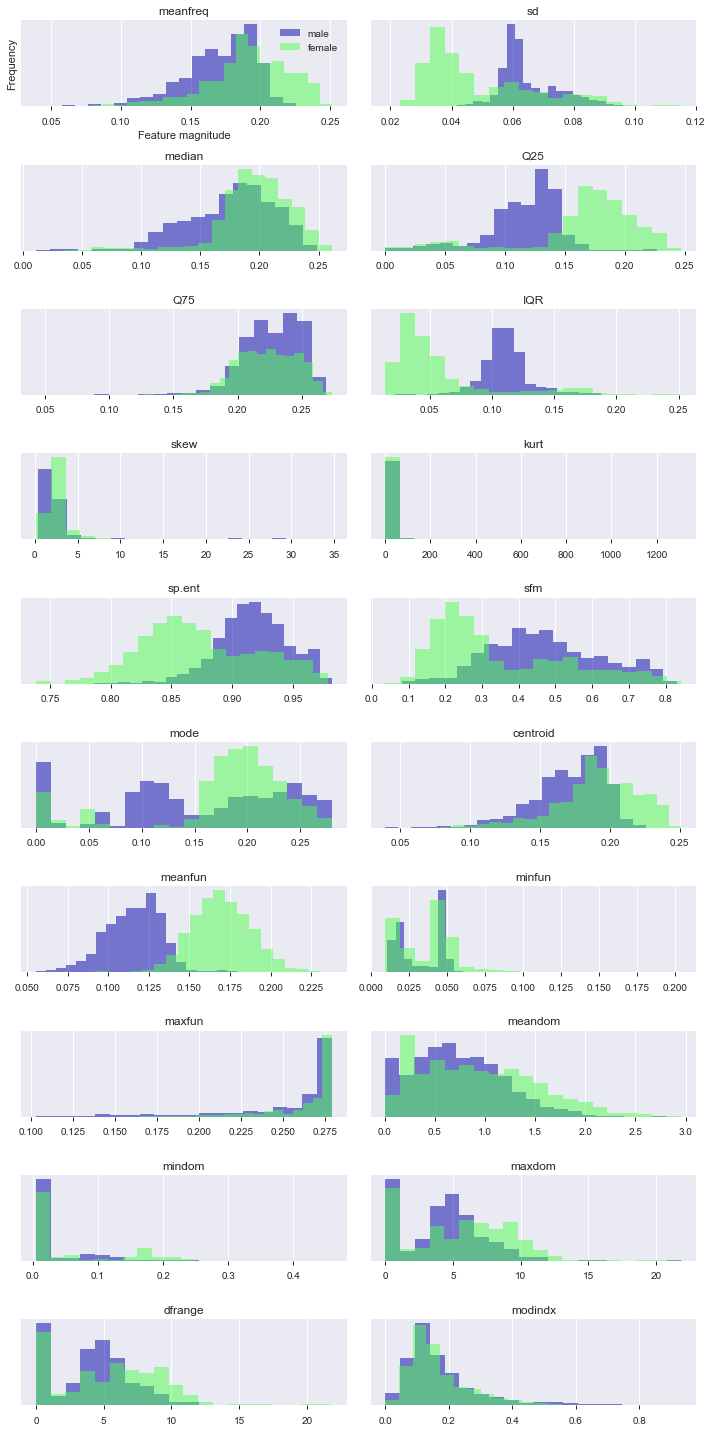

In [19]:
#Plot the histograms
male = mydata.loc[mydata['label']=='male']
female = mydata.loc[mydata['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.ix[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.ix[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()

In [20]:
#Prepare data for modeling
mydata.loc[:,'label'][mydata['label']=="male"] = 0
mydata.loc[:,'label'][mydata['label']=="female"] = 1
mydata_train, mydata_test = train_test_split(mydata, random_state=0, test_size=.2)
scaler = StandardScaler()
scaler.fit(mydata_train.ix[:,0:20])
X_train = scaler.transform(mydata_train.ix[:,0:20])
X_test = scaler.transform(mydata_test.ix[:,0:20])
y_train = list(mydata_train['label'].values)
y_test = list(mydata_test['label'].values)

In [21]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.961


In [25]:
#Decision Tree in scikit-learn

from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.976


In [23]:
#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Gradient Boosting
Accuracy on training set: 0.996
Accuracy on test set: 0.975


In [24]:
#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Support Vector Machine
Accuracy on training set: 0.985
Accuracy on test set: 0.984


In [27]:
#code for Graphviz

import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

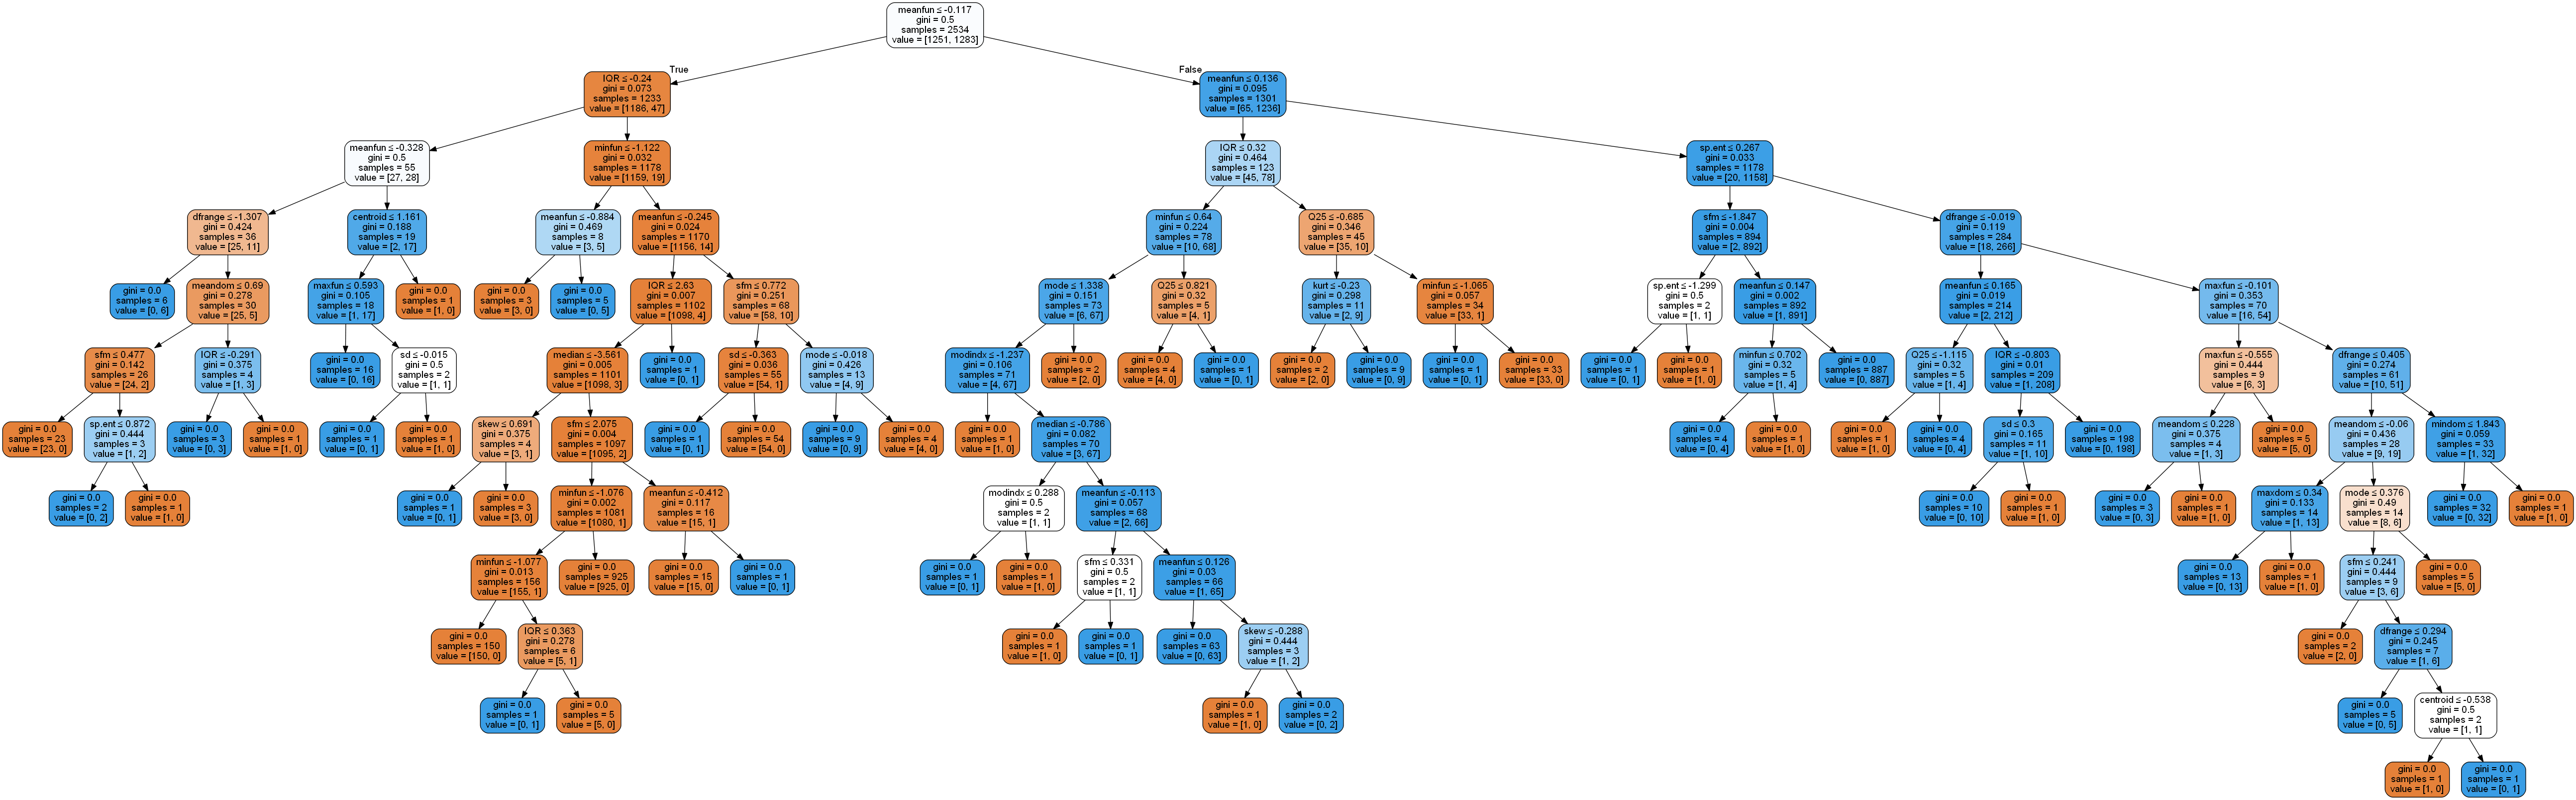

In [28]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())